# 3.5 Information filter

## Canonical Parameterization

Information matrix $\Omega$

$\Omega = \Sigma^{-1}$

Information vector $\xi$

$\xi = \Sigma^{-1}\mu$

### Mathematical Derivation of the Information Filter

#### Prediction

$\bar{\mu}_t = A_t \mu_{t-1} + B_t u_t$

$\bar{\Sigma}_t = A_t \Sigma_{t-1}A^T_t + R_t$

$\mu_{t-1} = \Omega^{-1}_{t-1} \xi_{t-1} $

$\Sigma_{t-1} = \Omega^{-1}_{t-1}$

$\bar{\Omega}_t = \left(A_t \Omega^{-1}_{t-1} A^T_t + R_t  \right)^{-1} $

$\bar{\xi}_t = \bar{\Omega}_t \left( A_t \Omega^{-1}_{t-1} \xi_{t-1} + B_t u_t \right)$

#### Measurement Update
$bel\left(x_t \right) = \eta \cdot p\left(z_t \mid x_t \right) \bar{bel} \left( x_t \right)$

$p\left(z_t \mid x_t \right) \sim \mathcal{N} \left(z_t; C_t x_t, Q_t\right)$

$\bar{bel} \left( x_t \right) \sim \mathcal{N} \left(x_t; \bar{\mu}_t, \bar{\Sigma}_t \right)$

$bel\left(x_t \right) = \eta \cdot exp \left\lbrace -\frac{1}{2} \left(z_t - C_t x_t\right)^T Q^{-1}_t \left(z_t - C_t x_t \right) - \frac{1}{2} \left(x_t - \bar{\mu} \right)^T \bar{\Sigma}^{-1}_t \left(x_t - \bar{\mu} \right) \right\rbrace$

$bel\left(x_t \right) = \eta \cdot exp\left\lbrace -\frac{1}{2}x^T_t C^T_t Q^{-1}_t C_t x_t + x^T_t C^T_t Q^{-1}_t z_t -\frac{1}{2}x^T_t \bar{\Sigma}^{-1}_t x_t + x^T_t \bar{\Sigma}^{-1}_t \bar{\mu}_t -\frac{1}{2} \bar{\mu}_t\bar{\Sigma}^{-1}_t{\bar{\mu}_t} \right\rbrace$

$ = \eta' \cdot exp\left\lbrace -\frac{1}{2}x^T_t C^T_t Q^{-1}_t C_t x_t + x^T_t C^T_t Q^{-1}_t z_t -\frac{1}{2}x^T_t \bar{\Omega}_t x_t + x^T_t \bar{\xi}_t \right\rbrace$

$ = \eta' \cdot exp\left\lbrace -\frac{1}{2}x^T_t \left[C^T_t Q^{-1}_t C_t + \bar{\Omega}_t \right]x_t + x^T_t \left[C^T_t Q^{-1}_t z_t + \bar{\xi}_t \right]\right\rbrace$

$\xi_t = C^T_t Q^{-1}_t z_t + \bar{\xi}_t$

$\Omega_t = C^T_t Q^{-1}_t C_t + \bar{\Omega}_t$

Table 3.5 The information filter algorithm

Algorithm Information_filter($\xi_{t-1}$, $\Omega_{t-1}$, $u_t$, $z_t$)

 - Prediction

   - $\bar{\Omega}_{t} = \left( A_t \Omega^{-1}_{t-1} A^T_t + R_t\right)^{-1}$

   - $\bar{\xi}_t = \bar{\Omega}_t \left(A_t \Omega^{-1}_{t-1} \xi_{t-1} + B_t u_t \right)$

 - Update

   - $\Omega_t = C^T_t Q^{-1}_t C_t + \bar{\Omega}_t$

   - $\xi_t = C^T_t Q^{-1}_t z_t + \bar{\xi}_t$

return $\xi_t$, $\Omega_t$

prediction
xp
[[2.0412465  1.06902934]]
Pp
[[1.01 0.  ]
 [0.   1.01]]
update
zt
[[1.9172557  1.02147285]]
xt
[[1.91847129 1.02193909]]
Pt
[[0.00990196 0.        ]
 [0.         0.00990196]]
prediction
xp
[[4.12115376 2.04704064]]
Pp
[[0.01990196 0.        ]
 [0.         0.01990196]]
update
zt
[[3.85366969 1.90568369]]
xt
[[3.94312338 1.95295716]]
Pt
[[0.00665574 0.        ]
 [0.         0.00665574]]


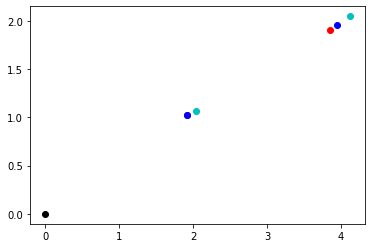

In [17]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure('state')

std_vx = 0.1
std_vy = 0.1

std_zx = 0.1
std_zy = 0.1

# Prediction
def predict(xi, Ot, ut):
    print('prediction')

    # process noise covariance
    Rt = np.array([
        [std_vx**2, 0],
        [0, std_vy**2]
    ])

    At = np.array([
        [1, 0],
        [0, 1]
    ])

    Bt = np.array([
        [1, 0],
        [0, 1]
    ])

    # compute predicted information matrix
    invO = np.linalg.inv(Ot)
    invOp = np.matmul(np.matmul(At, invO), At.T) + Rt
    Op = np.linalg.inv(invOp)

    # compute predicted information vector
    xip = np.matmul(Op, np.matmul(np.matmul(At.T, invO), xi) + np.matmul(Bt, ut))

    
    print('xp')
    x_pred = np.matmul(np.linalg.inv(Op), xip)    
    plt.scatter(x_pred[0], x_pred[1], c='c')
    print(x_pred.T)

    print('Pp')
    print(np.linalg.inv(Op))

    return xip, Op

def update(xip, Op, zt):
    print('update')
    # measurement matrix
    Ct = np.array([
        [1, 0],
        [0, 1]
    ])

    # measurement noise covariance
    Q = np.array([
        [std_zx**2, 0],
        [0, std_zy**2]
    ])
    invQ = np.linalg.inv(Q)

    Ot = np.matmul(np.matmul(Ct.T, invQ), Ct) + Op
    xi = np.matmul(np.matmul(Ct.T, invQ), zt) + xip

    print('zt')
    print(zt.T)
    plt.scatter(zt[0], zt[1], c='r')

    print('xt')
    xt = np.matmul(np.linalg.inv(Ot), xi)
    print(xt.T)
    plt.scatter(xt[0], xt[1], c='b')

    print('Pt')
    print(np.linalg.inv(Ot))

    return xi, Ot

# initialization
# position (x, y)
xt = np.array([
    [0],
    [0]
])

plt.scatter(xt[0], xt[1], c='k')

# covarinace
P = np.array([
    [1**2, 0],
    [0,    1**2]
])

# information matrix
Ot = np.linalg.inv(P)

# information vector
xi = np.matmul(Ot, xt)

# control (vx, vy)
vx = 2
vy = 1
ut = np.array([
    [vx + np.random.randn() * std_vx],
    [vy + np.random.randn() * std_vy],
])
xip, Op = predict(xi, Ot, ut)

# measurement (x, y)
zx = vx + np.random.randn() * std_zx
zy = vy + np.random.randn() * std_zy
zt = np.array([
    [zx],
    [zy]
])
xi, Ot = update(xip, Op, zt)


ut = np.array([
    [vx + np.random.randn() * std_vx],
    [vy + np.random.randn() * std_vy],
])
xip, Op = predict(xi, Ot, ut)

zx = vx*2 + np.random.randn() * std_zx
zy = vy*2 + np.random.randn() * std_zy
zt = np.array([
    [zx],
    [zy]
])
xi, Ot = update(xip, Op, zt)
